# 03 - Análise gráfica - Kaggle Titanic

Conjunto de análises gráficas dos dados de treino do Titanic após a realização dos tratamentos dos mesmos.

## Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.figsize'] = (12, 7)
sns.set(style='darkgrid')

## Carregando dados

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed/train_processed.csv')
del titanic['Unnamed: 0']
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria
0,0,3,male,22,1,0,SC,S,1,adulto_idoso
1,0,3,male,22,0,0,SC,C,0,adulto_idoso
2,0,3,male,22,0,0,SC,S,0,adulto_idoso
3,0,3,male,22,0,0,SC,S,0,adulto_idoso
4,1,3,female,22,0,0,SC,S,0,adulto_idoso


## Análise individual

### Sobreviventes

Começo com a contagem geral da proporção de sobreviventes na base de teste.

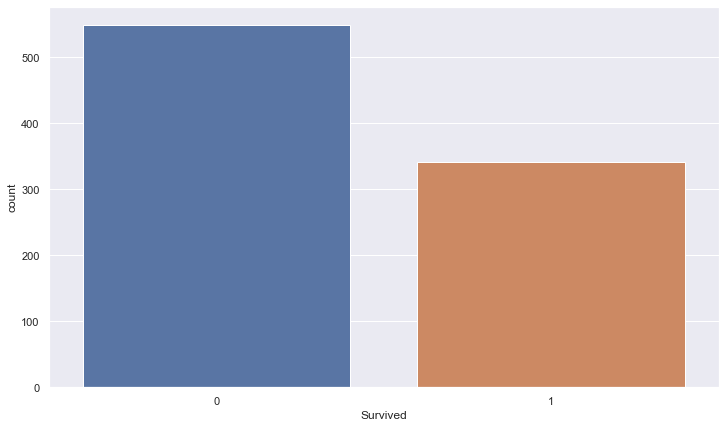

In [4]:
sns.countplot(x = 'Survived', data=titanic);

A maior parte das pessoas dessa base de dados não sobreviveu ao acidente, mas ainda assim foram vários os sobreviventes.

### Classe

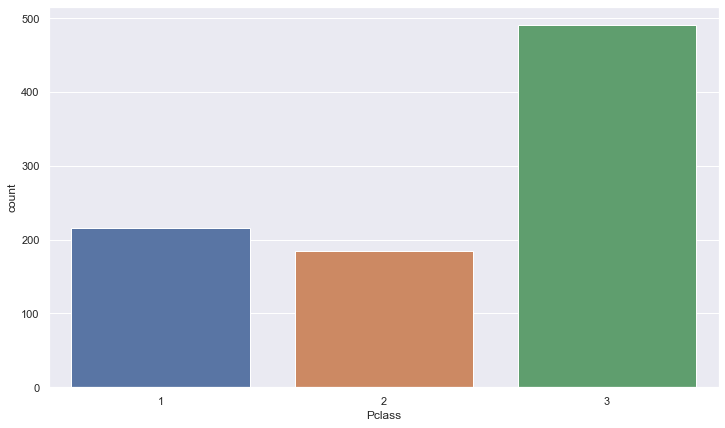

In [5]:
sns.countplot(x = 'Pclass', data=titanic);

A terceira classe possuía pouco mais pessoas que a primeira e segunda combinadas.

### Sexo

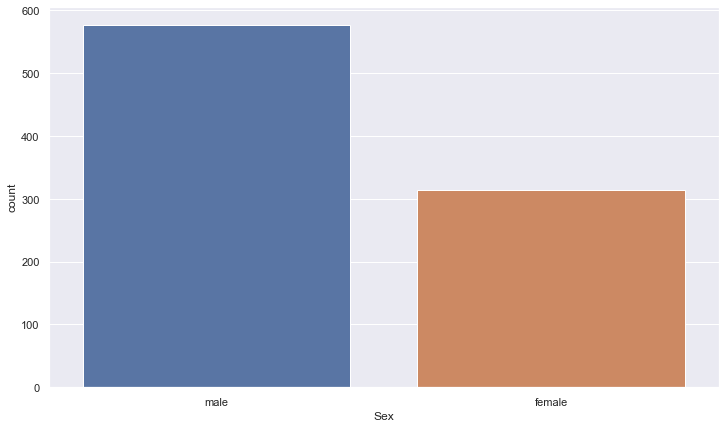

In [6]:
sns.countplot(x = 'Sex', data=titanic);

A maior parte dos integrantes do navio eram homens mas já sabemos que a maioria dos sobreviventes eram mulheres.

### Idade

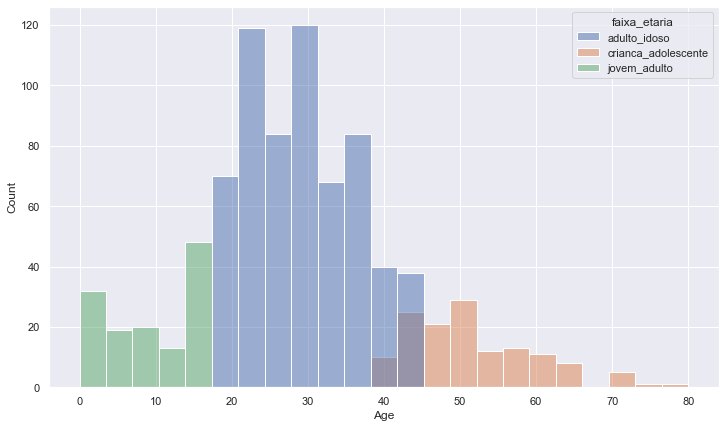

In [34]:
sns.histplot(x='Age', data=titanic, hue='faixa_etaria');

A maior parte dos passageiros tinha entre 20 e 45 anos.

### Faixa etária

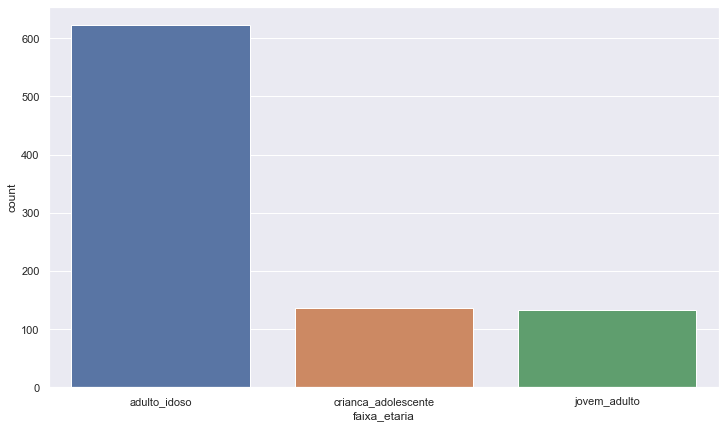

In [13]:
sns.countplot(x = 'faixa_etaria', data=titanic);

### SibSp

Corresponde ao número de irmãos e cônjuges a bordo. Não considera noivos, namorados ou semelhantes, apenas casados.

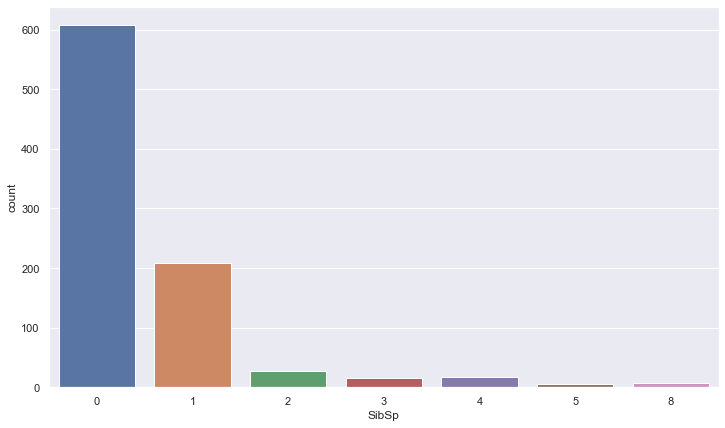

In [8]:
sns.countplot(x='SibSp', data=titanic);

### Parch

Corresponde ao número de pais e filhos acompanhando o passageiro.

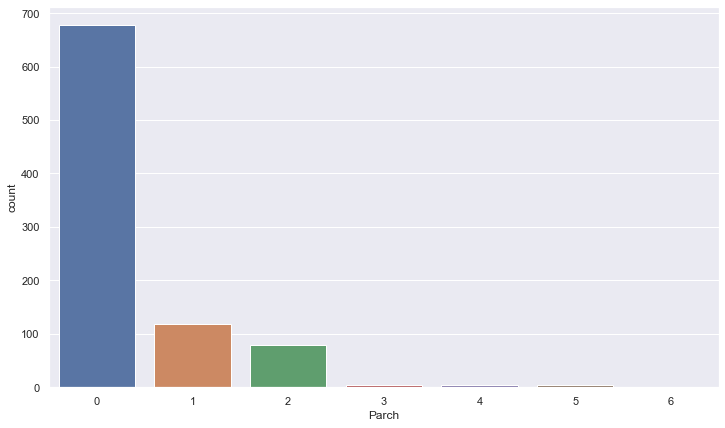

In [15]:
sns.countplot(x='Parch', data=titanic);

### Número total de parentes

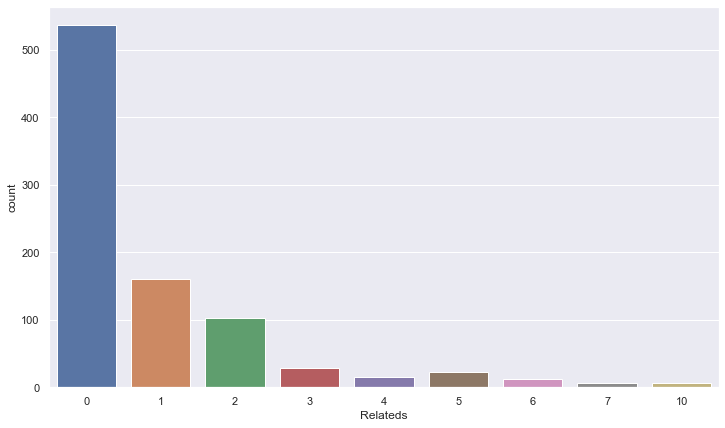

In [16]:
sns.countplot(x='Relateds', data=titanic);

É notável a quantidade de pessoas que estavam sozinhas no navio. O que acontece se compararmos as pessoas sozinhas versos a todas com pelo menos algum acompanhante?

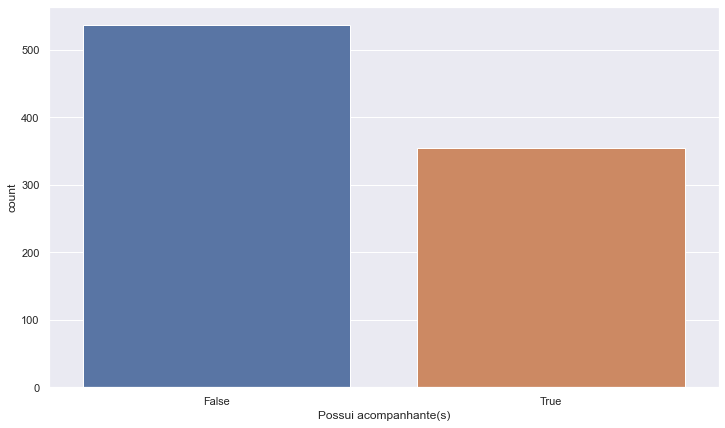

In [27]:
acompanhados = titanic['Relateds'] > 0
sns.countplot(x = acompanhados)
plt.xlabel('Possui acompanhante(s)');

É possível observar que a maior parte não possui acompanhantes, mas que a diferença reduz quando juntamos comparamos com o total de pessoas com pelo menos um acompanhante.

### Andar

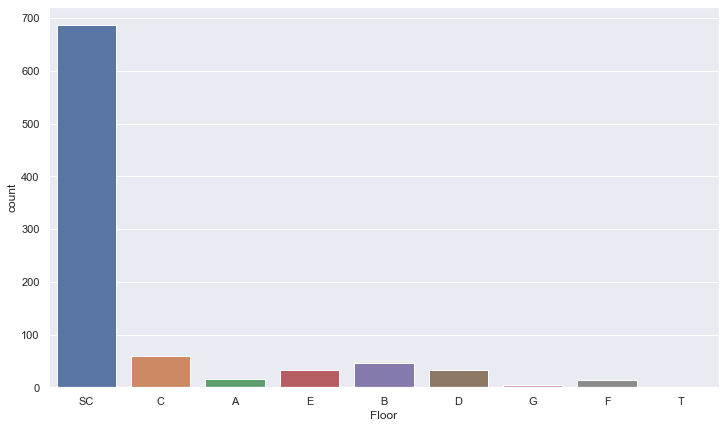

In [28]:
sns.countplot(x='Floor', data=titanic);

A maioria não tinha andar informado, mas dentre os que tinham, a distribuição pode ser melhor vista no gráfico abaixo:

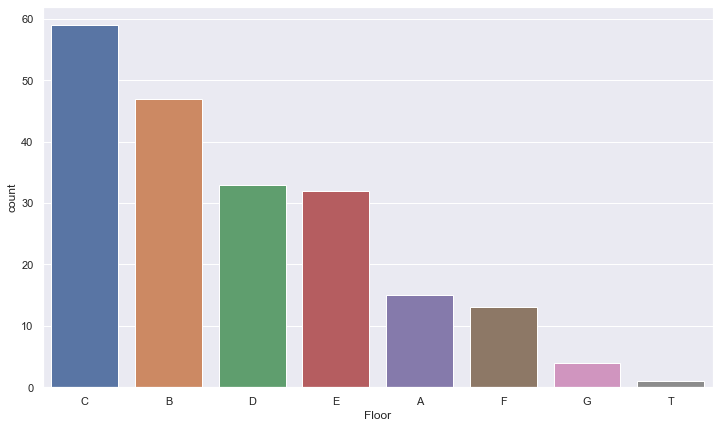

In [31]:
sns.countplot(x='Floor', data=titanic[titanic['Floor'] != 'SC'], order = titanic[titanic['Floor'] != 'SC']['Floor'].value_counts().index);

### Local de embarcação

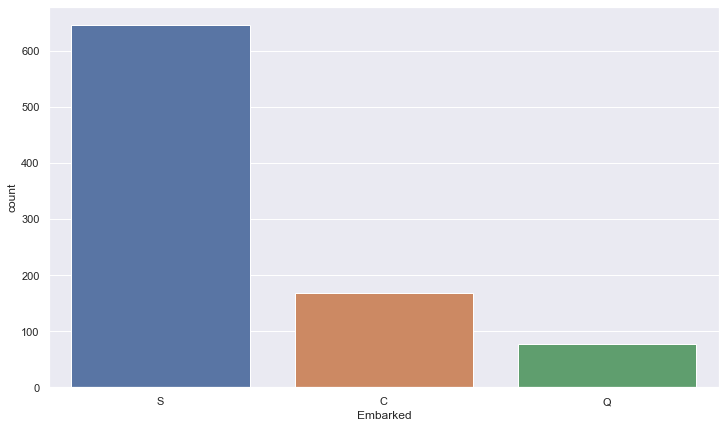

In [32]:
sns.countplot(x='Embarked', data=titanic);

## Sobreviventes por classe

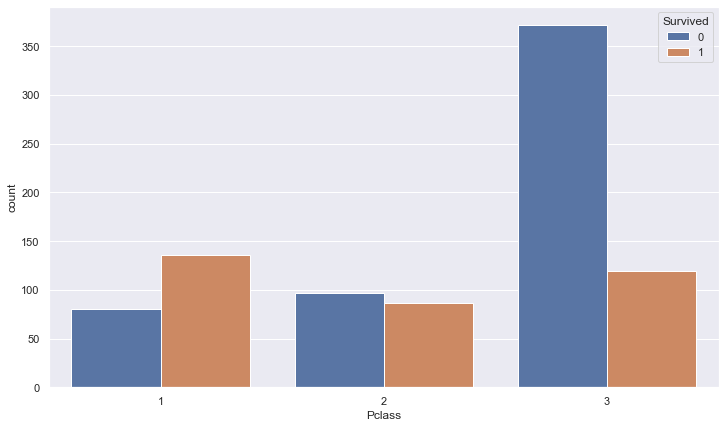

In [9]:
sns.countplot(x = 'Pclass', data=titanic, hue='Survived');

Um número bastante semelhante sobreviveu em cada classe, mas proporcionalmente a terceira classe foi a que mais pessoas morreram. Portanto é possível afirmar que existe uma relação entre a classe e a sobrevivência, especialmente para a terceira classe. 

## Sobreviventes por sexo

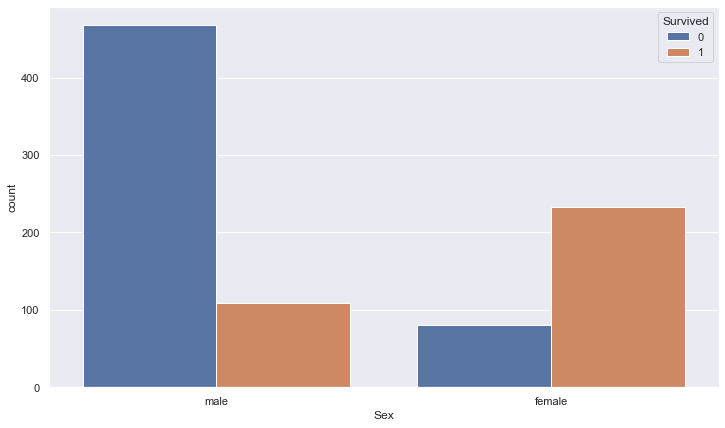

In [10]:
sns.countplot(x = 'Sex', data=titanic, hue='Survived');

É notável que tanto proporcionalmente quanto em números absolutos as mulheres sobreviveram muito mais.

## Sexo por classe

Para validar as conclusões dos dados anteriores e melhorar o conhecimento da base de dados, vamos ver se existe alguma diferença de proporção entre homens e mulheres entre as classes.

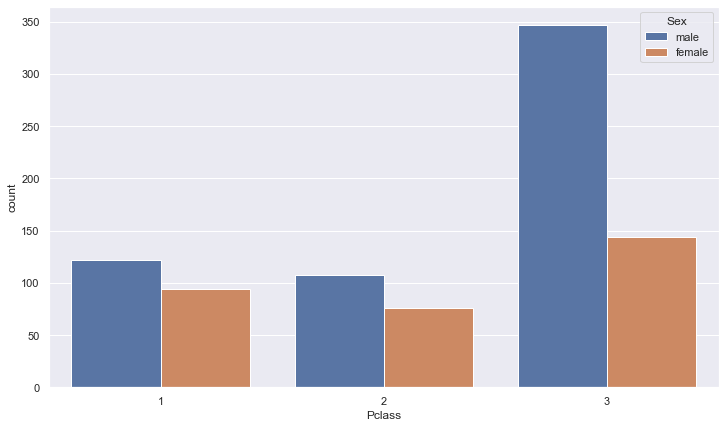

In [11]:
sns.countplot(x = 'Pclass', data=titanic, hue='Sex');

Em todas elas existem mais homens que mulheres, com um destaque proporcional para a terceira classe.